# Task 1 - Prediction Using Supervised Machine Learning

In [ ]:
## TSF_TASK-1     HARPREET SINGH 

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Importing Requires libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading data from remote link

In [2]:
url = "http://bit.ly/w-data"
student_data=pd.read_csv(url)
print("Student Data imported Succesfully")

Student Data imported Succesfully


In [3]:
student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Plotting the distribution of scores  

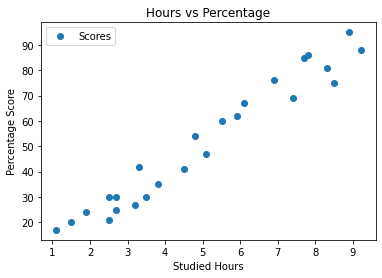

In [5]:
student_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Studied Hours')  
plt.ylabel('Percentage Score')  
plt.show()

### Preparing the data

In [8]:
X = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values

### Training and test sets

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

### Training the Algorithm

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


### Plotting the regression line

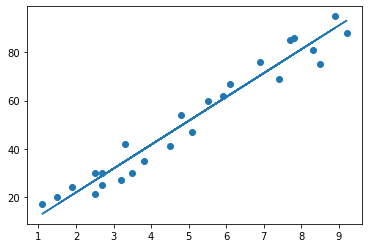

In [11]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making Predictions

In [12]:
print(X_test) 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Comparing the actual values and predicted values

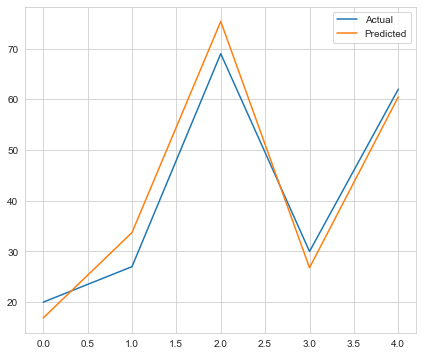

In [14]:
sns.set_style('whitegrid')
df.plot(kind='line',figsize=(7,6))

## Predicting score if a student studies for 9.25 hours/ day

In [15]:
hour=[[9.25]]
predicted_score=regressor.predict(hour)
print(f'Predicted Score: {predicted_score[0]} percent')

Predicted Score: 93.69173248737539 percent


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae=mean_absolute_error(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)
r_score=r2_score(y_pred,y_test)
rmse=np.sqrt(mse)
print('Mean Absoulte Error:',mae)
print('Mean Squared Error:',mse)
print('Root Mean Squared Error:',rmse)
print('R-Squared:',r_score)

Mean Absoulte Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-Squared: 0.9546785947197246
